In [1]:
# importing of packages--
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
# read the data file
def read_data():
    data=pd.read_csv("C:/top mentor data sci assignmets/14 may/Salary_Data.csv")
    return data

In [3]:
# calling the function--
data= read_data()
print(data.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [4]:
#renaming columns--
data=data.rename({'YearsExperience':'yrs_exp','Salary':'salary'},axis=1)
print(data.head(5))

   yrs_exp   salary
0      1.1  39343.0
1      1.3  46205.0
2      1.5  37731.0
3      2.0  43525.0
4      2.2  39891.0


In [5]:
# checking for missing values--
data.isnull().sum()

yrs_exp    0
salary     0
dtype: int64

In [6]:
# print basic info about data--
print(data.columns)
print("Data types---")
print("==========================")
print(data.dtypes)
print("==========================")
print("Info---")
print(data.info())
print("==========================")
print("Average salary---")
print(int(data["salary"].mean()))
print("Minimum salary---")
print(int(data["salary"].min()))
print("Maximum salary---")
print(int(data["salary"].max()))

Index(['yrs_exp', 'salary'], dtype='object')
Data types---
yrs_exp    float64
salary     float64
dtype: object
Info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   yrs_exp  30 non-null     float64
 1   salary   30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None
Average salary---
76003
Minimum salary---
37731
Maximum salary---
122391


In [7]:
data["salary"]=data["salary"].astype("int")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   yrs_exp  30 non-null     float64
 1   salary   30 non-null     int32  
dtypes: float64(1), int32(1)
memory usage: 488.0 bytes


AxesSubplot(0.125,0.11;0.775x0.77)


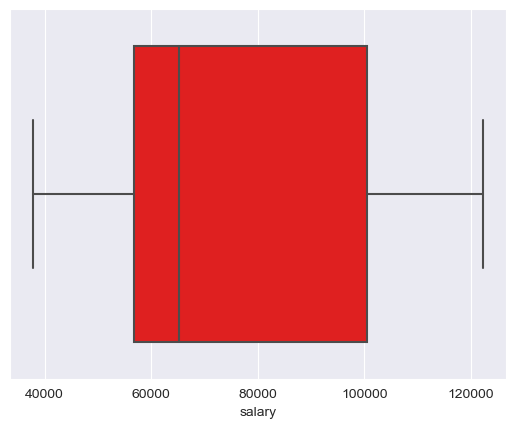

In [8]:
# EDA
# checking for outliers--
print(sns.boxplot(x=data["salary"],color="red"))

AxesSubplot(0.125,0.11;0.775x0.77)


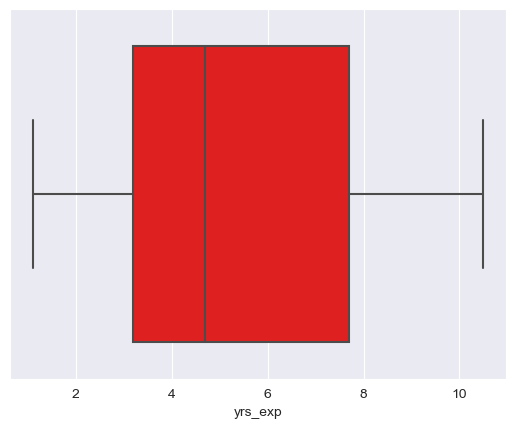

In [9]:
print(sns.boxplot(x=data["yrs_exp"],color="red"))

0.35411967922959153


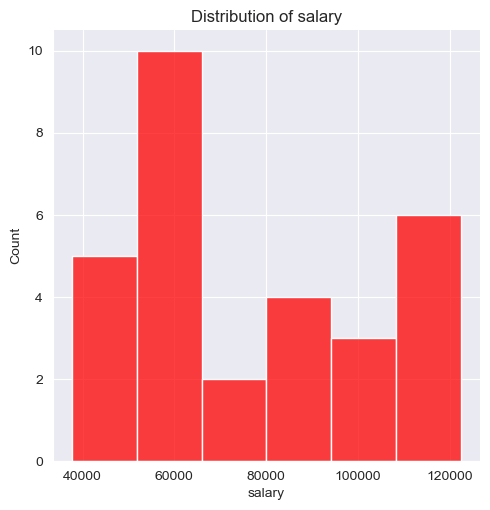

In [10]:
# distribution of salary--
sns.displot(x=data["salary"],color="red")
plt.title("Distribution of salary")
print(data["salary"].skew())

<AxesSubplot:xlabel='yrs_exp', ylabel='salary'>

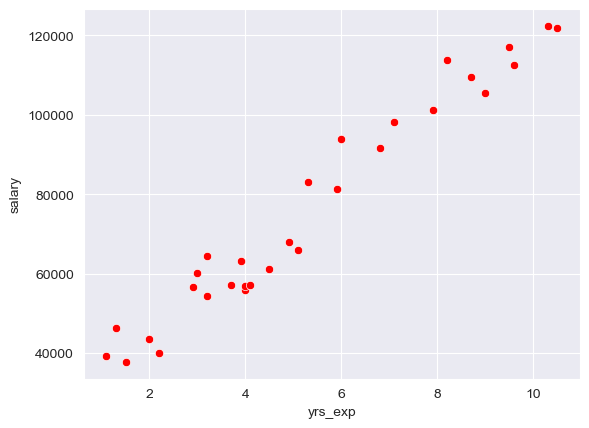

In [11]:
sns.scatterplot(x="yrs_exp",y="salary",data=data,color="red")

<AxesSubplot:xlabel='yrs_exp', ylabel='salary'>

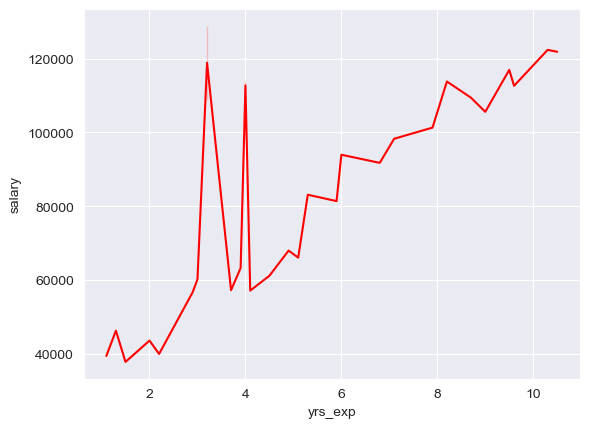

In [12]:
sns.lineplot(x="yrs_exp",y="salary",data=data,estimator="sum",color="red")

<AxesSubplot:xlabel='yrs_exp', ylabel='salary'>

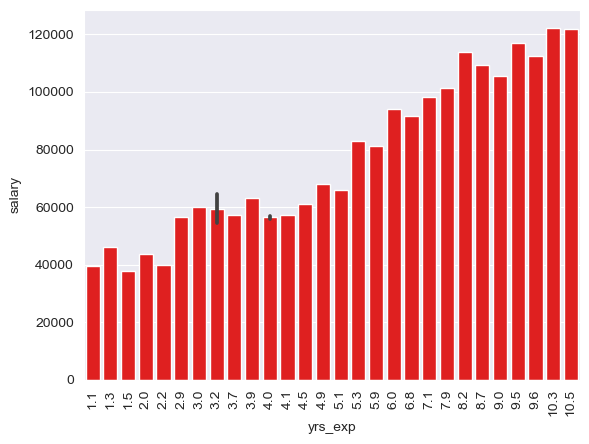

In [13]:
plt.xticks(rotation=90,fontsize="medium")
sns.barplot(x="yrs_exp",y="salary",data=data,color="red")

<AxesSubplot:xlabel='yrs_exp', ylabel='salary'>

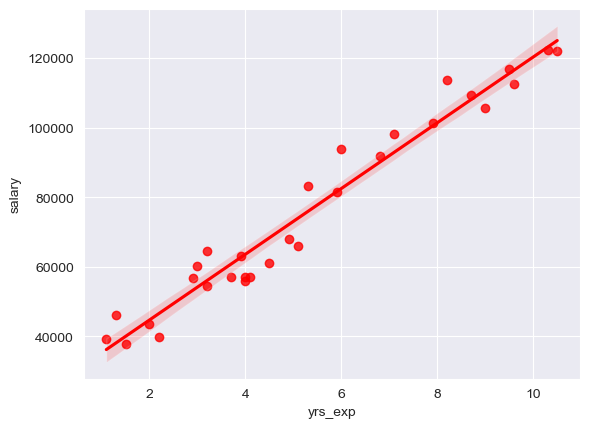

In [14]:
sns.regplot(x="yrs_exp",y="salary",data=data,color="red")

<AxesSubplot:>

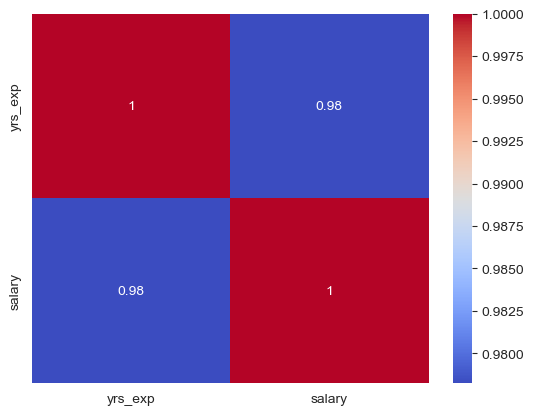

In [15]:
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

## Q Build a prediction model for Salary_hike

In [16]:
# Simple linear regression
# creating dataframe--
df=data
print(df.head())

   yrs_exp  salary
0      1.1   39343
1      1.3   46205
2      1.5   37731
3      2.0   43525
4      2.2   39891


In [17]:
df.shape

(30, 2)

In [18]:
#sampling of data
training,testing=train_test_split(df,test_size=0.2)

In [19]:
print(training.head())
training.shape

    yrs_exp  salary
27      9.6  112635
18      5.9   81363
7       3.2   54445
25      9.0  105582
3       2.0   43525


(24, 2)

In [20]:
print(testing.head())
testing.shape

    yrs_exp  salary
4       2.2   39891
26      9.5  116969
1       1.3   46205
13      4.1   57081
17      5.3   83088


(6, 2)

In [21]:
#defining--
X=training["yrs_exp"]
y=training["salary"]
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
#Create object of Linear Regression model
model=LinearRegression()
print(model)

LinearRegression()


In [24]:
train_model=model.fit(X,y)
print("Model training is completed")
print(train_model)

Model training is completed
LinearRegression()


In [25]:
print(model.coef_)
print(model.intercept_)

[[9268.48648948]]
[26219.2891731]


In [34]:
x1=2.0    #y=mx+b
y=9268.48648948*x1 + 26219.2891731
print("Salary with {} yrs of experience is {}".format(x1,y))

Salary with 2.0 yrs of experience is 44756.26215206


In [27]:
X_test=testing["yrs_exp"].values.reshape(-1,1)
X_test

array([[2.2],
       [9.5],
       [1.3],
       [4.1],
       [5.3],
       [8.2]])

In [36]:
pred_salary=train_model.predict(X_test)
pred_salary

array([[ 46609.95944997],
       [114269.9108232 ],
       [ 38268.32160943],
       [ 64220.08377999],
       [ 75342.26756737],
       [102220.87838687]])

In [29]:
testing["pred_salary"]=pred_salary
testing

,yrs_exp,salary,pred_salary
4,2.2,39891,46609.959450
26,9.5,116969,114269.910823
1,1.3,46205,38268.321609
13,4.1,57081,64220.083780
17,5.3,83088,75342.267567
23,8.2,113812,102220.878387


In [30]:
testing["error"]=testing["salary"]-testing["pred_salary"]
testing

,yrs_exp,salary,pred_salary,error
4,2.2,39891,46609.959450,-6718.959450
26,9.5,116969,114269.910823,2699.089177
1,1.3,46205,38268.321609,7936.678391
13,4.1,57081,64220.083780,-7139.083780
17,5.3,83088,75342.267567,7745.732433
23,8.2,113812,102220.878387,11591.121613


In [31]:
round(r2_score(testing["salary"],testing["pred_salary"])*100,2)

93.68

<AxesSubplot:xlabel='yrs_exp', ylabel='salary'>

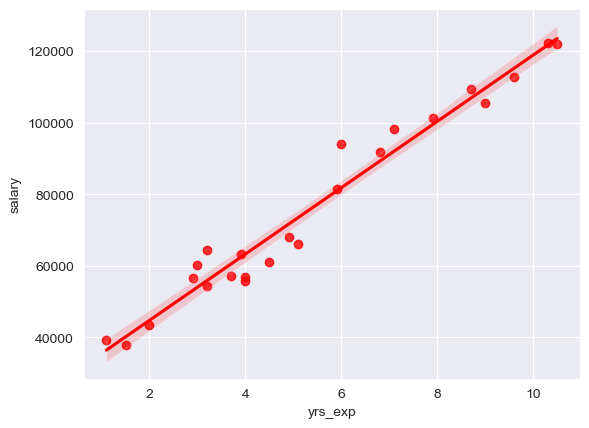

In [32]:
sns.regplot(x="yrs_exp",y="salary",data=training,color="red")

<AxesSubplot:xlabel='yrs_exp', ylabel='pred_salary'>

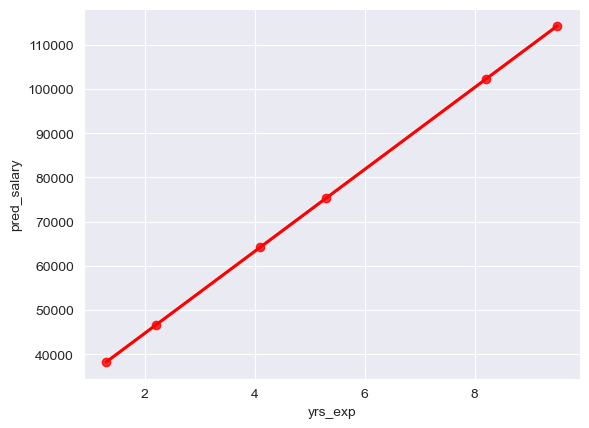

In [33]:
sns.regplot(x="yrs_exp",y="pred_salary",data=testing,color="red")